# 📌 Predição de Evasão de Alunos em Cursos de Graduação

## 1 - Introdução

A evasão de alunos em cursos de graduação é um problema significativo no ensino superior, impactando instituições acadêmicas e políticas educacionais. Identificar padrões e prever quais alunos têm maior probabilidade de evadir pode permitir a implementação de estratégias preventivas e aumentar as taxas de retenção.

Este estudo tem como objetivo desenvolver um modelo de aprendizado de máquina capaz de prever a evasão de alunos com base em informações acadêmicas e demográficas. Os dados utilizados foram extraídos do **Sistema Integrado de Gestão de Atividades Acadêmicas (SIGAA)** e incluem um conjunto de 5.042 alunos dos cursos de **Ciência da Computação, Enfermagem e Ciência e Tecnologia** que frequentaram o turno **vespertino** de forma **presencial** em uma universidade pública brasileira.

O período analisado abrange ingressos entre **2011 e 2024**, e o foco do estudo está na construção de um modelo preditivo interpretável, que possa auxiliar na tomada de decisão acadêmica.

---


### 1.1 -  Bibliotecas Utilizadas

Para realizar a análise e modelagem preditiva da evasão de alunos, utilizamos diversas bibliotecas do ecossistema Python. Abaixo estão as principais bibliotecas e suas funções no projeto:

- **numpy** e **pandas**: Manipulação e análise de dados.
- **matplotlib**, **seaborn** e **plotly**: Visualização de dados.
- **sklearn.preprocessing**: Transformação e padronização dos dados.
- **imbalanced-learn**: Técnicas de balanceamento de dados, como o SMOTE.
- **sklearn.model_selection**: Divisão dos dados em treino e teste, além de validação cruzada.
- **sklearn.metrics**: Avaliação de modelos preditivos.
- **sklearn.ensemble**: Algoritmos de aprendizado de máquina, como Random Forest.
- **xgboost**: Implementação otimizada do algoritmo Gradient Boosting.
- **joblib**: Salvamento e carregamento de modelos treinados.

---


In [1]:
import numpy   as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
import numpy as np
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import joblib
sns.set_theme()

## 2 Carregamento e Estrutura dos Dados

Os dados utilizados neste estudo estão armazenados em um arquivo CSV chamado **Base_limpa_alunos_maior_2010_concluido_desligado.csv**. Esta base contém **5.042 registros**, representando alunos de diferentes cursos que ingressaram entre **2011 e 2024**.

### 🔹 **Pré-processamento dos Dados**
A base utilizada **já passou por um processo de preparação e tratamento** antes de ser importada para este estudo. As etapas que já foram realizadas incluem:
- **Limpeza de dados**: Remoção de inconsistências, preenchimento de valores ausentes e padronização.
- **Derivação de novas variáveis**: Criação de atributos relevantes para prever a evasão.

💡 **Importante**: Este projeto **não aborda o processo de limpeza e preparação dos dados**, focando exclusivamente na modelagem preditiva

---


In [12]:
# Carregamento da base de dados
alunos = pd.read_csv('base/Base_limpa_alunos_maior_2010_concluido_desligado.csv', delimiter=',')

# Definir a coluna "Nome" como índice
alunos.set_index('Nome', inplace=True)

print(f"✅ Base carregada com sucesso! Total de registros: {len(alunos)}")

✅ Base carregada com sucesso! Total de registros: 5042


### 2.1 Dicionário de Dados

A tabela abaixo descreve as variáveis contidas na base de dados utilizada para prever a evasão de alunos:

| **Nome da Variável**                          | **Descrição** |
|----------------------------------------------|----------------------------------------------------------------|
| `Curso`                                      | Nome do curso em que o aluno está matriculado |
| `Data_Nascimento`                            | Data de nascimento do aluno |
| `Cidade_Estado`                              | Cidade e estado de origem do aluno |
| `CEP`                                        | Código de Endereçamento Postal do aluno |
| `Sexo`                                       | Gênero do aluno (`Masculino` ou `Feminino`) |
| `Tipo_Rede_Ensino`                           | Tipo da escola onde o aluno concluiu o ensino médio (`Pública` ou `Privada`) |
| `Tipo_Raca`                                  | Autodeclaração racial do aluno |
| `Ano_Ingresso`                               | Ano em que o aluno ingressou na universidade |
| `Periodo_Ingresso`                           | Semestre de ingresso do aluno |
| `Forma_Ingresso`                             | Método pelo qual o aluno ingressou (`Enem`, `Vestibular`, `Transferência`, etc.) |
| `Ano_Periodo_Saida`                          | Ano e semestre em que o aluno saiu da universidade |
| `Tipo_Saida`                                 | Motivo da saída (`Desligamento`, `Cancelamento Espontâneo `, `Recusa de Matricula`, etc.) |
| `Prazo_Integralizacao`                       | Tempo máximo esperado para o aluno concluir o curso |
| `Coeficiente_de_Rendimento`                  | Média geral das notas do aluno |
| `Média_de_Conclusão`                         | Média das notas dos alunos concluintes do curso |
| `Índice_de_Eficiência_em_Carga_Horária`      | Índice que avalia a relação entre a carga horária cursada e a carga horária ideal |
| `Índice_de_Eficiência_em_Períodos_Letivos`   | Índice que mede a eficiência do aluno em relação ao tempo de curso |
| `Índice_de_Eficiência_Acadêmica`             | Índice que sintetiza os outros índices de eficiência acadêmica |
| `Status`                                     | Situação atual do aluno (`Concluído` e `Desligado`) |
| `Prazo_Integralizacao_Ano`                   | Tempo de integralização do curso em anos |
| `Prazo_Integralizacao_Semestre`              | Tempo de integralização do curso em semestres |
| `Ano_Saida`                                  | Ano de saída do aluno |
| `Semestre_Saida`                             | Semestre de saída do aluno |
| `Tempo_permanencia_Meses`                    | Tempo total de permanência do aluno na universidade (em meses) |
| `Data_Ingresso`                              | Data exata de ingresso do aluno |
| `Idade_Ingresso`                             | Idade do aluno no momento do ingresso na universidade |
| `Faixa_Etaria`                               | Categoria de idade do aluno (`até 20`, `21-25 anos`, etc.) |
| `Região_Origem`                              | Região geográfica de origem do aluno (`São Luís-MA`, `Outros Municípios do MA` e `Outros Estados`.) |

---
💡 **Observação**: Algumas variáveis foram derivadas para facilitar a modelagem preditiva, como `Idade_Ingresso`,`Faixa_Etaria`,`Região_Origem`, `Faixa_Etaria`, `Tempo_permanencia_Meses`.

⚠️ **Importante**: O processo de derivação dessas variáveis **não faz parte deste projeto**. Toda a limpeza, transformação e derivação de atributos foi realizada em um estudo anterior, cujo foco era o **Analise dos dados**. Este projeto, por outro lado, concentra-se exclusivamente na **modelagem preditiva da evasão**.


### 2.2 Seleção de Variáveis para Modelagem

Após uma análise em conjunto com especialistas do negócio, identificamos que algumas variáveis **já sugerem diretamente a evasão do aluno**, tornando a predição redundante. Além disso, algumas informações não são relevantes para a modelagem ou não estariam disponíveis em um cenário de previsão real.

Por esses motivos, foram **removidas as seguintes variáveis** do conjunto de dados antes da modelagem:

| **Nome da Variável**         | **Motivo da Exclusão** |
|------------------------------|----------------------------------------------------------------|
| `Data_Nascimento`            | Informação pessoal que não influencia diretamente a evasão, por essa característica foi útil para criar `Faixa_Etaria` |
| `Cidade_Estado`              | Detalhe geográfico irrelevante para o modelo, essa característica foi substituída pela `Região_Origem` |
| `CEP`                        | Informação muito granular sem impacto direto |
| `Ano_Ingresso`               | Pode estar correlacionado com variáveis de tempo |
| `Periodo_Ingresso`           | Já representado de forma mais útil em outras variáveis |
| `Forma_Ingresso`             | Pode ser um fator, mas sua relação com evasão não é clara |
| `Ano_Periodo_Saida`          | Já indica se o aluno saiu, tornando a predição redundante |
| `Tipo_Saida`                 | Indica explicitamente se o aluno evadiu ou concluiu |
| `Prazo_Integralizacao`       | Informação que pode estar disponível apenas a posteriori |
| `Prazo_Integralizacao_Semestre` | Já representado em outras colunas |
| `Ano_Saida`                  | Sugere diretamente se o aluno saiu |
| `Semestre_Saida`             | Indica claramente o momento da saída |
| `Tempo_permanencia_Meses`     | Medida exata do tempo de permanência, tornando a predição óbvia |
| `Data_Ingresso`              | Informação redundante com `Ano_Ingresso` e `Periodo_Ingresso` |
| `Idade_Ingresso`             | Pode ser derivada de `Data_Nascimento` |
| `Curso`                      | Não é uma variável preditiva do comportamento do aluno |

💡 **Importante**: A remoção dessas variáveis **não compromete a capacidade do modelo de prever a evasão**, mas evita que ele dependa de informações que já indicam diretamente a evasão, garantindo que a predição seja baseada em fatores mais gerais e interpretáveis.



In [13]:
#Removendo variáveis que não serão utilizadas na modelagem
var_excluir = ['Data_Nascimento','Cidade_Estado','CEP','Ano_Ingresso','Periodo_Ingresso','Forma_Ingresso','Ano_Periodo_Saida','Tipo_Saida','Prazo_Integralizacao','Prazo_Integralizacao_Ano',
                'Prazo_Integralizacao_Semestre','Ano_Saida','Semestre_Saida','Tempo_permanencia_Meses','Data_Ingresso','Idade_Ingresso','Curso']

df_modelagem = alunos.drop(columns=var_excluir)


# Verificando a nova estrutura da base
print(f"✅ Número de variáveis restantes: {df_modelagem.shape[1]}")
df_modelagem.head()

✅ Número de variáveis restantes: 11


,Sexo,Tipo_Rede_Ensino,Tipo_Raca,Coeficiente_de_Rendimento,Média_de_Conclusão,Índice_de_Eficiência_em_Carga_Horária,Índice_de_Eficiência_em_Períodos_Letivos,Índice_de_Eficiência_Acadêmica,Status,Faixa_Etaria,Região_Origem
Nome,,,,,,,,,,,
ABGAIL DIAS DOS SANTOS,F,Privada,Negro/Preto,7.5054,8.1619,0.9205,0.7865,5.9090,CONCLUÍDO,até 20,São Luís-MA
ABIDIRAN MARIA RIBEIRO COSTA,F,Pública,Negro/Pardo,7.0575,7.8881,0.5920,0.4384,2.0472,DESLIGADO,21 a 25,Outros Municípios do Maranhão
ABIQUEILA RAQUEL ALMEIDA,F,Não Informado,Não Informado,0.0000,0.0000,0.0000,0.0000,0.0000,DESLIGADO,até 20,Outros Municípios do Maranhão
ADAILSON RAIMUNDO MOREIRA GARCEZ JUNIOR,M,Privada,Amarelo,6.4957,8.3227,0.7586,0.8209,5.1828,DESLIGADO,21 a 25,São Luís-MA
ADALIA KARINA GOMES RIBEIRO,F,Pública,Branco,4.2434,7.7235,0.3301,0.2510,0.6399,DESLIGADO,até 20,São Luís-MA


### 2.3 Distribuição da Situação do Aluno

Antes de prosseguir com a modelagem preditiva, apresentamos a distribuição da variável `Status`, que indica se o aluno **concluiu o curso ou foi desligado**.

💡 **Nota**:  
A análise exploratória mais aprofundada deste conjunto de dados foi realizada em um estudo anterior. Neste projeto, **nosso foco é a modelagem preditiva**, por isso, apresentamos apenas a distribuição da situação dos alunos.

---


In [9]:
df_modelagem.columns

Index(['Sexo', 'Tipo_Rede_Ensino', 'Tipo_Raca', 'Coeficiente_de_Rendimento',
       'Média_de_Conclusão', 'Índice_de_Eficiência_em_Carga_Horária',
       'Índice_de_Eficiência_em_Períodos_Letivos',
       'Índice_de_Eficiência_Acadêmica', 'Status', 'Faixa_Etaria',
       'Região_Origem'],
      dtype='object')

In [15]:
df = df_modelagem['Status'].value_counts().reset_index()

df.columns = ['Status', 'count']
# Dicionário para correspondência das cores
cores_situacao = {
    'CONCLUÍDO': '#065A57',  
    'DESLIGADO': '#5A021F', 
}

# Conversão do dicionário de cores para uma lista, alinhada com os valores únicos de 'Novo_Status'
ordem_status = df['Status'].tolist()
cores_alinhadas = [cores_situacao[status] for status in ordem_status if status in cores_situacao]
# Criação do gráfico com ajuste para cores
grafico = px.bar(
    df,
    x='Status',
    y='count',
    color='Status',
    color_discrete_sequence=cores_alinhadas, 
    title='Distribuição Situação do Aluno'
)
# Atualizar layout do gráfico
grafico.update_layout(
    xaxis_title='Status',
    yaxis_title='Quantidade de Alunos',
    height=500,
    width=800,
    xaxis=dict(tickangle=0)  # Mantém rótulos alinhados no eixo X
)
grafico.show()

## 3 Preparação dos Dados
Antes de treinar o modelo, é necessário preparar os dados para que possam ser utilizados corretamente pelos algoritmos de aprendizado de máquina. 

### 3.1 - Codificação das Variáveis Categóricas
Nesta etapa, realizamos a **codificação das variáveis categóricas** utilizando o método **Label Encoding**.

As seguintes variáveis categóricas foram convertidas para valores numéricos:
- `Tipo_Raca`
- `Tipo_Rede_Ensino`
- `Faixa_Etaria`
- `Sexo`
- `Região_Origem`

Utilizamos a classe `LabelEncoder` da biblioteca `scikit-learn` para transformar essas variáveis em números, garantindo que o modelo possa interpretar corretamente seus valores.

---


In [19]:
# Criando uma cópia do dataset para codificação
df_modelagem_encod = df_modelagem.copy()

# Definição das variáveis categóricas a serem codificadas
variaveis_categoricas = ['Tipo_Raca', 'Tipo_Rede_Ensino', 'Faixa_Etaria','Sexo','Região_Origem']

# Dicionário para armazenar os encoders usados
label_encoders = {} 

# Aplicando Label Encoding em cada variável categórica
for col in variaveis_categoricas:
    le = LabelEncoder()
    df_modelagem_encod[col] = le.fit_transform(df_modelagem[col])  
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Mapeamento para '{col}': {mapping}")
    label_encoders[col] = le  

Mapeamento para 'Tipo_Raca': {'Amarelo': 0, 'Branco': 1, 'Indígeno': 2, 'Negro/Pardo': 3, 'Negro/Preto': 4, 'Não Informado': 5}
Mapeamento para 'Tipo_Rede_Ensino': {'Não Informado': 0, 'Privada': 1, 'Pública': 2, 'Pública/Privada': 3}
Mapeamento para 'Faixa_Etaria': {'21 a 25': 0, '26 a 30': 1, '31 a 40': 2, 'até 20': 3, 'maior de 40': 4}
Mapeamento para 'Sexo': {'F': 0, 'M': 1}
Mapeamento para 'Região_Origem': {'Outros Estados': 0, 'Outros Municípios do Maranhão': 1, 'São Luís-MA': 2}


###  3.2 - Salvamento dos Encoders

Os encoders gerados para cada variável categórica foram armazenados em um arquivo `.pkl` utilizando a biblioteca `joblib`. Esse arquivo poderá ser utilizado no futuro para garantir que os mesmos mapeamentos sejam aplicados em **novos dados de previsão**, evitando inconsistências entre os dados de treinamento e os dados de produção.

---


In [20]:
joblib.dump(label_encoders, "Model/label_encoders_13_02.pkl")

['Model/label_encoders_13_02.pkl']

### 3.3 - Normalização das Variáveis Numéricas

Para garantir que as variáveis numéricas estejam na mesma escala e **evitar que atributos com valores muito altos influenciem excessivamente o modelo**, aplicamos a **normalização** utilizando o método **StandardScaler**.

#### 🔹 O que é o StandardScaler?
O `StandardScaler` da biblioteca `scikit-learn` transforma os dados para que tenham **média 0 e desvio padrão 1**, garantindo que todas as variáveis tenham a mesma influência no modelo.

#### 🔹 Variáveis Normalizadas
Foram normalizadas apenas as variáveis numéricas (`float64`), incluindo:
- `Coeficiente_de_Rendimento`
- `Média_de_Conclusão`
- `Índice_de_Eficiência_em_Carga_Horária`
- `Índice_de_Eficiência_em_Períodos_Letivos`
- `Índice_de_Eficiência_Acadêmica`

---


In [21]:
# Selecionar apenas as variáveis numéricas para normalização
numeric_features = df_modelagem_encod.select_dtypes(include=['float64']).columns

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler e transformar as variáveis numéricas
df_modelagem_encod[numeric_features] = scaler.fit_transform(df_modelagem[numeric_features])

### 3.4 - Salvamento do Scaler
O `StandardScaler` treinado foi salvo no arquivo **`scaler_numerico_13_02_B.pkl`** para que seja utilizado futuramente na padronização de novos dados.

---

In [67]:
joblib.dump(scaler, "Model/scaler_numerico_13_02_B.pkl")

['Model/scaler_numerico_13_02_B.pkl']

## 4 - Criação do modelo

### 4.1 - Separação dos Dados para Treinamento e Teste

Para avaliar o desempenho do modelo, é essencial dividir o conjunto de dados em duas partes:
- **Treinamento (70%)**: Usado para treinar o modelo.
- **Teste (30%)**: Usado para avaliar a capacidade do modelo de generalizar para novos dados.

### 🔹 Estratégia de Divisão:
- Utilizamos a função `train_test_split` do `scikit-learn` para fazer a separação dos dados.
- A variável **alvo** (`Status`) foi transformada em valores numéricos:
  - `CONCLUÍDO = 1`
  - `DESLIGADO = 0`
- A divisão mantém a mesma proporção das classes (**estratificação por `y`**) para evitar desbalanceamento nos conjuntos.

---


In [22]:
# Definindo as variáveis explicativas (X) e a variável-alvo (y)
X = df_modelagem_encod.drop(columns=["Status"])
y = df_modelagem_encod["Status"].map({"CONCLUÍDO": 1, "DESLIGADO": 0})  # Transformação da variável alvo

# Divisão dos dados em treino (70%) e teste (30%), com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Exibir o número de registros em cada conjunto
print(f"✅ O dataset de treino possui {X_train.shape[0]} alunos e o de teste {X_test.shape[0]} alunos.")


✅ O dataset de treino possui 3529 alunos e o de teste 1513 alunos.


### 4.2 Balanceamento das Classes com SMOTE

Os dados apresentavam um **desbalanceamento** entre alunos que **concluíram** e aqueles que foram **desligados**, o que poderia impactar negativamente a performance do modelo, fazendo com que ele tenha um viés para a classe majoritária.

Para mitigar esse problema, utilizamos a técnica **SMOTE (Synthetic Minority Over-sampling Technique)**, que cria exemplos sintéticos da classe minoritária em vez de apenas replicar os existentes. 

#### 🔹 Estratégia Utilizada:
- **Antes do SMOTE:** A classe majoritária (`DESLIGADO`) era bem maior do que a classe minoritária (`CONCLUÍDO`).
- **Após o SMOTE:** O conjunto de treino foi balanceado, igualando as quantidades de registros em ambas as classes.

⚠️ **Importante**: O SMOTE foi aplicado **apenas no conjunto de treinamento** para evitar vazamento de informações no teste.

---


In [24]:
# Inicializando o SMOTE com balanceamento total (1:1)
smote = SMOTE(sampling_strategy=1, random_state=42)

# Aplicando o SMOTE para balancear as classes na base de treino
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificando o balanceamento antes e depois do SMOTE
print("Distribuição de classes antes do SMOTE:", y_train.value_counts())
print("\nDistribuição de classes após o SMOTE:", pd.Series(y_train_bal).value_counts())

print("\n✅ SMOTE aplicado com sucesso! Conjunto de treino balanceado.")

Distribuição de classes antes do SMOTE: Status
0    2607
1     922
Name: count, dtype: int64

Distribuição de classes após o SMOTE: Status
0    2607
1    2607
Name: count, dtype: int64

✅ SMOTE aplicado com sucesso! Conjunto de treino balanceado.


### 4.3 - Treinamento e Avaliação de Modelos

Nesta etapa, comparamos diferentes algoritmos de aprendizado de máquina para prever a evasão de alunos. O objetivo é testar qual modelo apresenta o **melhor desempenho** com base em múltiplas métricas.

##### 🔹 Modelos Testados:
- **Árvore de Decisão (`DecisionTreeClassifier`)**
- **Random Forest (`RandomForestClassifier`)**
- **Regressão Logística (`LogisticRegression`)**
- **XGBoost (`XGBClassifier`)**

##### 🔹 Estratégia de Avaliação:
- Utilizamos **Validação Cruzada Estratificada (`StratifiedKFold`)** com **5 folds** para garantir que o modelo seja testado em diferentes subconjuntos dos dados.
- Avaliamos os modelos com as seguintes métricas:
  - **Acurácia**: Proporção de previsões corretas.
  - **Precisão**: Proporção de previsões positivas corretas.
  - **Recall**: Capacidade de identificar corretamente os casos de evasão.
  - **F1-Score**: Média harmônica entre precisão e recall, balanceando ambas as métricas.

💡 **Importante**: O uso de **validação cruzada** reduz o risco de overfitting e nos permite ter uma estimativa mais confiável do desempenho dos modelos.

---


In [25]:
# Definir a semente aleatória para reprodutibilidade
SEED = 42
np.random.seed(SEED)

# Criar a validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Inicializar os modelos
model_dt = DecisionTreeClassifier(max_depth=3, random_state=SEED)
model_rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
model_log = LogisticRegression(solver='liblinear', random_state=SEED)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=SEED)

# Lista de modelos e nomes
models = [model_dt, model_rf, model_log, model_xgb]
names = ['Árvore de Decisão', 'Random Forest', 'Regressão Logística', 'XGBoost']

# Definição das métricas
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Testar cada modelo usando validação cruzada
for name, model in zip(names, models):
    print(f"\n🔹 Modelo: {name}")
    for metric, scorer in scoring.items():
        score = cross_val_score(model, X_train_bal, y_train_bal, cv=cv, scoring=scorer).mean()
        print(f"✅ {metric.capitalize()}: {score * 100:.2f}%")



🔹 Modelo: Árvore de Decisão
✅ Accuracy: 91.43%
✅ Precision: 89.58%
✅ Recall: 93.79%
✅ F1: 91.62%

🔹 Modelo: Random Forest
✅ Accuracy: 94.48%
✅ Precision: 92.51%
✅ Recall: 96.82%
✅ F1: 94.60%

🔹 Modelo: Regressão Logística
✅ Accuracy: 91.48%
✅ Precision: 88.84%
✅ Recall: 94.90%
✅ F1: 91.77%

🔹 Modelo: XGBoost
✅ Accuracy: 94.21%
✅ Precision: 92.50%
✅ Recall: 96.24%
✅ F1: 94.33%


### 4.4 - Ajuste de Hiperparâmetros do Modelo XGBoost

Para otimizar o desempenho do modelo **XGBoost**, realizamos um **ajuste de hiperparâmetros** utilizando duas abordagens:

1️⃣ **RandomizedSearchCV**  
   - Busca aleatória entre um conjunto de hiperparâmetros pré-definidos.
   - Permite explorar uma ampla gama de combinações sem testar todas as possibilidades, economizando tempo computacional.

2️⃣ **GridSearchCV (Refinamento Final)**  
   - Após encontrar uma boa combinação inicial, realizamos uma busca mais refinada em torno dos melhores valores encontrados.
   - Isso nos permite ajustar o modelo com mais precisão e otimizar sua performance.

### 🔹 Hiperparâmetros Ajustados:
- `n_estimators`: Número de árvores no modelo.
- `max_depth`: Profundidade máxima das árvores.
- `learning_rate`: Taxa de aprendizado.
- `subsample`: Fração de amostras utilizadas para treinamento.
- `colsample_bytree`: Fração de colunas usadas por árvore.
- `gamma`: Complexidade da árvore (poda).
- `min_child_weight`: Peso mínimo para divisão de nós.

---


In [27]:
# Configuração da semente para reprodutibilidade
SEED = 42
np.random.seed(SEED)

# Criar a validação cruzada estratificada com menos divisões para reduzir o tempo
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)  # Reduzimos de 5 para 3 para acelerar

# Inicialização do modelo XGBoost
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=SEED
)

# Grid de Hiperparâmetros ajustado para busca mais eficiente
param_dist = {
    'n_estimators': [100, 300, 500],  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'subsample': [0.7, 0.9],  
    'colsample_bytree': [0.7, 0.9],  
    'gamma': [0, 0.1, 0.2],  
    'min_child_weight': [1, 3, 5]  
}

# Configuração do RandomizedSearchCV (reduzimos as interações para acelerar)
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Reduzimos de 20 para 10 para agilizar
    cv=cv,
    scoring='precision',  
    n_jobs=-1,
    verbose=2,
    random_state=SEED
)

# Treinamento do RandomizedSearchCV
random_search.fit(X_train_bal, y_train_bal)

# Melhor combinação de hiperparâmetros encontrada
print("🔹 Melhores hiperparâmetros encontrados com RandomizedSearchCV:")
print(random_search.best_params_)

# Melhor pontuação alcançada com esses hiperparâmetros
print(f"🔹 Melhor Precisão: {random_search.best_score_:.4f}")

# Refinando a busca com GridSearchCV usando os melhores hiperparâmetros
best_params = random_search.best_params_

# Ajustando uma faixa menor para refinar os hiperparâmetros
param_grid = {
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'max_depth': [max(3, best_params['max_depth'] - 1), best_params['max_depth'], best_params['max_depth'] + 1],
    'learning_rate': [max(0.01, best_params['learning_rate'] - 0.03), best_params['learning_rate'], best_params['learning_rate'] + 0.03],
    'subsample': [best_params['subsample']],  
    'colsample_bytree': [best_params['colsample_bytree']],  
    'gamma': [best_params['gamma']],  
    'min_child_weight': [best_params['min_child_weight']]  
}

# Configuração do GridSearchCV para refinar os melhores hiperparâmetros
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv,
    scoring='precision',  
    n_jobs=-1,
    verbose=2
)

# Treinamento do GridSearchCV
grid_search.fit(X_train_bal, y_train_bal)

# Melhor combinação de hiperparâmetros encontrada após refinamento
print("\n🔹 Melhores hiperparâmetros encontrados com GridSearchCV:")
print(grid_search.best_params_)

# Melhor pontuação alcançada com esses hiperparâmetros refinados
print(f"🔹 Melhor Precisão após refinamento: {grid_search.best_score_:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_

### 4.5 Ajuste de Threshold: Trade-off entre Precisão e Recall

A escolha do **threshold de decisão** do modelo influencia diretamente os resultados das previsões.  
Por padrão, os classificadores baseados em probabilidades utilizam um **threshold de 0.5**, ou seja, qualquer previsão com probabilidade maior que 50% é classificada como positiva. No entanto, esse valor pode não ser ideal para o problema de **predição de evasão de alunos**, pois:
- Um **threshold muito alto** favorece **alta precisão**, mas pode reduzir o **recall**, perdendo casos de evasão.
- Um **threshold muito baixo** favorece **alto recall**, mas pode aumentar **falsos positivos**.

Para encontrar um **threshold ótimo**, realizamos um **trade-off entre Precisão e Recall**, analisando diferentes valores e escolhendo aquele que maximiza o **F1-Score**.

### 🔹 Estratégia Utilizada:
1️⃣ **Treinamos o modelo XGBoost com os melhores hiperparâmetros ajustados**  
2️⃣ **Calculamos Precisão e Recall para diferentes thresholds**  
3️⃣ **Selecionamos o threshold que maximiza o F1-Score**  
4️⃣ **Reavaliamos o modelo utilizando esse novo threshold**

---


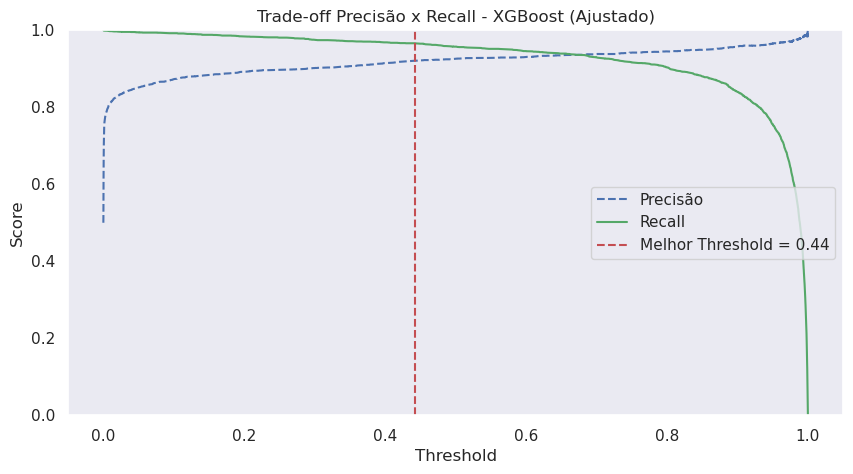

🔹 Melhor Threshold Encontrado para o Trade-off: 0.44
📊 Relatório de Classificação com Threshold Ajustado:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1117
           1       0.83      0.91      0.87       396

    accuracy                           0.93      1513
   macro avg       0.90      0.92      0.91      1513
weighted avg       0.93      0.93      0.93      1513



In [30]:
# Definir a semente para reprodutibilidade
SEED = 42
np.random.seed(SEED)

# Criar a validação cruzada estratificada com menos splits para reduzir tempo
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

# Inicializar o modelo XGBoost com os melhores hiperparâmetros ajustados
best_xgb_model = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.2,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=5,
    n_estimators=450,
    subsample=0.9,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=SEED
)

# Obter previsões probabilísticas usando validação cruzada
y_scores = cross_val_predict(best_xgb_model, X_train_bal, y_train_bal, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]

# Calcular Precisão e Recall para diferentes thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train_bal, y_scores)

# Identificar o melhor threshold baseado no F1-Score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]  # Melhor Threshold pelo F1-Score

# 📊 Plotando o gráfico de trade-off
plt.figure(figsize=(10, 5))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Melhor Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Trade-off Precisão x Recall - XGBoost (Ajustado)')
plt.legend(loc='center right')
plt.ylim([0, 1])
plt.grid()
plt.show()

# Exibir o melhor threshold encontrado
print(f"🔹 Melhor Threshold Encontrado para o Trade-off: {best_threshold:.2f}")

# Treinar o modelo final com os melhores hiperparâmetros e threshold ajustado
best_xgb_model.fit(X_train_bal, y_train_bal)
y_pred_adjusted = (best_xgb_model.predict_proba(X_test)[:, 1] >= best_threshold).astype(int)

# Avaliar a performance final
print("📊 Relatório de Classificação com Threshold Ajustado:")
print(classification_report(y_test, y_pred_adjusted))


### 4.6 Avaliação Final do Modelo

Após otimizar o modelo **XGBoost**, realizamos a **avaliação final** considerando o threshold ajustado.  
A matriz de confusão e as métricas ajustadas nos permitem entender como o modelo se comporta em termos de **erros e acertos**.

#### 🔹 Ajustes Finais:
- **Threshold ajustado** para `0.44` baseado no **trade-off entre Precisão e Recall**.
- **Validação cruzada com `StratifiedKFold` (5 folds)** para reduzir variações nos resultados.
- **Geração da Matriz de Confusão** para entender erros do modelo.

#### 🔹 Interpretação da Matriz de Confusão:
A matriz de confusão nos ajuda a visualizar:
- **Verdadeiros Positivos (VP)** → Casos corretamente previstos como evasão.
- **Falsos Positivos (FP)** → Casos incorretamente previstos como evasão.
- **Verdadeiros Negativos (VN)** → Casos corretamente previstos como não evasão.
- **Falsos Negativos (FN)** → Casos incorretamente previstos como não evasão.

---


🔹 Nova Precisão: 0.9206
🔹 Novo Recall: 0.9689


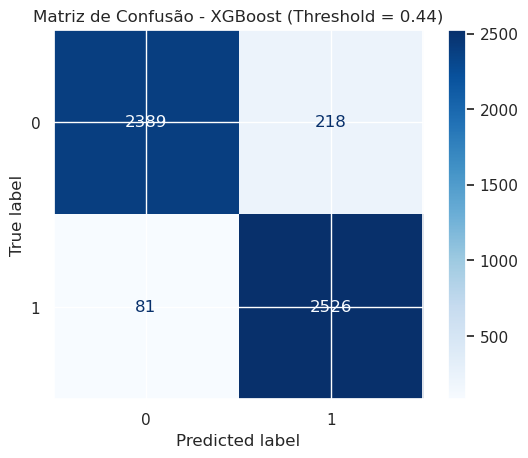

📊 Relatório de Classificação com Threshold Ajustado:
              precision    recall  f1-score   support

           0     0.9672    0.9164    0.9411      2607
           1     0.9206    0.9689    0.9441      2607

    accuracy                         0.9427      5214
   macro avg     0.9439    0.9427    0.9426      5214
weighted avg     0.9439    0.9427    0.9426      5214



In [35]:
# Definir a semente para reprodutibilidade
SEED = 42
np.random.seed(SEED)

# Criar a validação cruzada estratificada (5 folds para maior estabilidade)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Inicializar o modelo XGBoost com os melhores hiperparâmetros ajustados
best_xgb_model = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.2,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=5,
    n_estimators=450,
    subsample=0.9,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=SEED
)

# Obter previsões probabilísticas usando validação cruzada
y_scores = cross_val_predict(best_xgb_model, X_train_bal, y_train_bal, cv=cv, method="predict_proba")[:, 1]

# Aplicando o melhor threshold encontrado (0.44)
threshold = 0.44
y_train_pred_threshold = (y_scores > threshold).astype(int)

# Comparar os scores com o novo threshold
print('🔹 Nova Precisão: {:.4f}'.format(precision_score(y_train_bal, y_train_pred_threshold)))
print('🔹 Novo Recall: {:.4f}'.format(recall_score(y_train_bal, y_train_pred_threshold)))

# Gerar a Matriz de Confusão
matriz_confusao = confusion_matrix(y_train_bal, y_train_pred_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
disp.plot(cmap="Blues", values_format="d")  
plt.title(f"Matriz de Confusão - XGBoost (Threshold = {threshold})")
plt.show()

# Exibir Relatório de Classificação
print("📊 Relatório de Classificação com Threshold Ajustado:")
print(classification_report(y_train_bal, y_train_pred_threshold, digits=4))


### 4.7 Teste do Modelo na Base de Teste (Sem Ajuste de Threshold)

Agora que o modelo **XGBoost** foi treinado e validado, testamos sua performance na **base de teste**.

#### 🔹 Estratégia:
- Avaliamos o modelo usando **previsões diretas** (`predict`), que por padrão utilizam um **threshold de 0.5**.
- Calculamos **Acurácia, Precisão, Recall e F1-Score** para entender o desempenho antes do ajuste de threshold.
- Geramos a **Matriz de Confusão** para visualizar erros do modelo.

#### 🔹 Importância:
- Esse teste nos permite **comparar os resultados antes e depois da aplicação do threshold ajustado**.
- Como visto na análise anterior, o **threshold padrão de 0.5 pode não ser o ideal**, pois há um trade-off entre **Precisão e Recall**.

---



🔍 Avaliação SEM ajuste de threshold:
Acurácia: 0.930601454064772
Precisão: 0.8423529411764706
Recall: 0.9040404040404041

📊 Relatório de Classificação SEM ajuste de threshold:
               precision    recall  f1-score   support

           0     0.9651    0.9400    0.9524      1117
           1     0.8424    0.9040    0.8721       396

    accuracy                         0.9306      1513
   macro avg     0.9037    0.9220    0.9122      1513
weighted avg     0.9330    0.9306    0.9314      1513



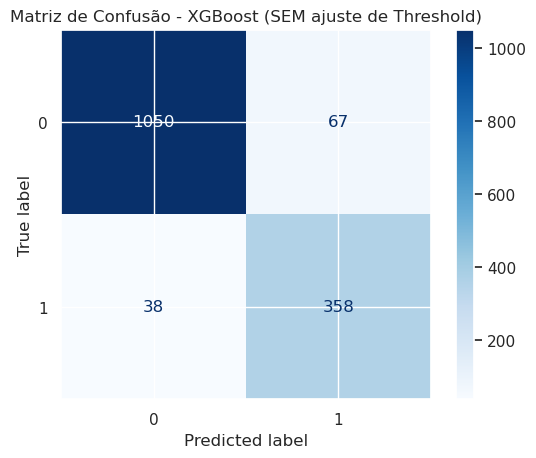

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Inicializar o modelo XGBoost com os melhores hiperparâmetros ajustados
best_xgb_model = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.2,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=5,
    n_estimators=450,
    subsample=0.9,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=SEED
)

# Treinar o modelo na base de treino
best_xgb_model.fit(X_train_bal, y_train_bal)

# Previsões na base de teste SEM ajuste de threshold (uso padrão do modelo)
y_test_pred_default = best_xgb_model.predict(X_test)

# Avaliação SEM ajuste de threshold
print("\n🔍 Avaliação SEM ajuste de threshold:")
print("Acurácia:", accuracy_score(y_test, y_test_pred_default))
print("Precisão:", precision_score(y_test, y_test_pred_default))
print("Recall:", recall_score(y_test, y_test_pred_default))
print("\n📊 Relatório de Classificação SEM ajuste de threshold:\n", classification_report(y_test, y_test_pred_default, digits=4))

# Gerando Matriz de Confusão
matriz_confusao_default = confusion_matrix(y_test, y_test_pred_default)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_default)
disp.plot(cmap="Blues", values_format="d")  
plt.title("Matriz de Confusão - XGBoost (SEM ajuste de Threshold)")
plt.show()


### 4.8 Teste do Modelo na Base de Teste (Com Threshold Ajustado)

Após ajustar o modelo **XGBoost**, realizamos um novo teste na **base de teste**, desta vez aplicando o **threshold otimizado (`0.44`)**.

### 🔹 Estratégia:
- Em vez de usar a previsão padrão do modelo (`predict`), utilizamos `predict_proba` para obter as **probabilidades das previsões**.
- Aplicamos o **threshold de 0.44**, ajustado anteriormente no trade-off entre **Precisão e Recall**.
- Calculamos novamente as métricas **Acurácia, Precisão, Recall e F1-Score** para comparar com os resultados anteriores.
- Geramos uma **Matriz de Confusão** para visualizar as mudanças nos erros do modelo.

### 🔹 Objetivo:
- Comparar os resultados **com e sem threshold ajustado**.
- Avaliar o impacto do threshold na **detecção de evasão**.

---



🔍 Avaliação COM ajuste de threshold (0.44):
Acurácia: 0.9272967614011897
Precisão: 0.8294930875576036
Recall: 0.9090909090909091

📊 Relatório de Classificação COM ajuste de threshold:
               precision    recall  f1-score   support

           0     0.9666    0.9338    0.9499      1117
           1     0.8295    0.9091    0.8675       396

    accuracy                         0.9273      1513
   macro avg     0.8981    0.9214    0.9087      1513
weighted avg     0.9307    0.9273    0.9283      1513



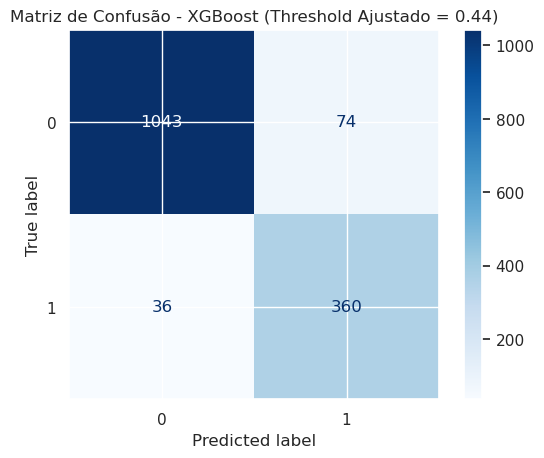

In [39]:
# TESTE 2 - Com Threshold Ajustado (0.44)
threshold = 0.44

# Obter probabilidades de previsão
y_test_scores = best_xgb_model.predict_proba(X_test)[:, 1]

# Aplicar o Threshold Ajustado
y_test_pred_threshold = (y_test_scores > threshold).astype(int)

# Avaliação COM ajuste de threshold
print(f"\n🔍 Avaliação COM ajuste de threshold ({threshold}):")
print("Acurácia:", accuracy_score(y_test, y_test_pred_threshold))
print("Precisão:", precision_score(y_test, y_test_pred_threshold))
print("Recall:", recall_score(y_test, y_test_pred_threshold))
print("\n📊 Relatório de Classificação COM ajuste de threshold:\n", classification_report(y_test, y_test_pred_threshold, digits=4))

# Gerando Matriz de Confusão
matriz_confusao_threshold = confusion_matrix(y_test, y_test_pred_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_threshold)
disp.plot(cmap="Blues", values_format="d")  
plt.title(f"Matriz de Confusão - XGBoost (Threshold Ajustado = {threshold})")
plt.show()


### 4.9 Salvando o Modelo Treinado

Agora que o modelo **XGBoost** foi treinado e avaliado, salvamos sua versão final para futuras previsões.

### 🔹 Arquivos Salvos:
📌 O modelo foi salvo no formato `.pkl` com `joblib`, garantindo uma **carregamento eficiente**.

---


In [40]:

# Salvar o modelo treinado em um arquivo
joblib.dump(best_xgb_model, "Model/model_xgboost_prever_conclusao_13_02.pkl")

print(f"✅ Modelo salvo com sucesso")

✅ Modelo salvo com sucesso
